In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/sample.csv")

df.head()


,gene,expression
0,TP53,10.5
1,EGFR,8.2
2,BRCA1,5.4
3,BRCA2,6.7


In [2]:
df.describe()

,expression
count,4.000000
mean,7.700000
std,2.189368
min,5.400000
25%,6.375000
50%,7.450000
75%,8.775000
max,10.500000


In [3]:
df["gene"]   
df["expression"]


0    10.5
1     8.2
2     5.4
3     6.7
Name: expression, dtype: float64

In [4]:
df["gene"]

0     TP53
1     EGFR
2    BRCA1
3    BRCA2
Name: gene, dtype: object

In [5]:
df["expression"]

0    10.5
1     8.2
2     5.4
3     6.7
Name: expression, dtype: float64

In [6]:
df["gene","expression"]

KeyError: ('gene', 'expression')

In [7]:
df[df["expression"] > 7] 


,gene,expression
0,TP53,10.5
1,EGFR,8.2


In [8]:
df[df["expression"] <=7]   


,gene,expression
2,BRCA1,5.4
3,BRCA2,6.7


In [9]:
df[df["expression"] <=8.2] 


,gene,expression
1,EGFR,8.2
2,BRCA1,5.4
3,BRCA2,6.7


In [10]:
df.sort_values(by="expression", ascending=False)


,gene,expression
0,TP53,10.5
1,EGFR,8.2
3,BRCA2,6.7
2,BRCA1,5.4


In [11]:
df.sort_values(by="expression", ascending=true)


NameError: name 'true' is not defined

In [12]:
df.sort_values(by="expression", ascending=True)


,gene,expression
2,BRCA1,5.4
3,BRCA2,6.7
1,EGFR,8.2
0,TP53,10.5


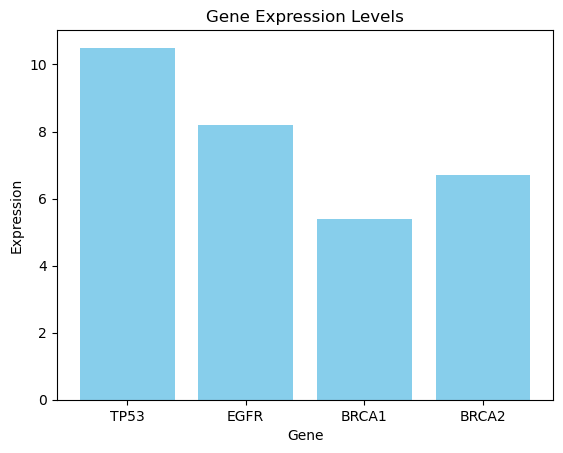

In [13]:
plt.bar(df["gene"], df["expression"], color="skyblue")
plt.title("Gene Expression Levels")
plt.xlabel("Gene")
plt.ylabel("Expression")
plt.show()


In [14]:
df[df["gene"].isin(["TP53", "EGFR"])]


,gene,expression
0,TP53,10.5
1,EGFR,8.2


In [15]:
df[df["expression"].isin(["10.5", "8.2"])]


,gene,expression


In [16]:
df[(df["expression"] == 10.5) | (df["expression"] == 8.2)]

,gene,expression
0,TP53,10.5
1,EGFR,8.2


In [17]:
df[df["expression"] >= 6]

,gene,expression
0,TP53,10.5
1,EGFR,8.2
3,BRCA2,6.7


In [18]:
df.query("expression == 10.5 or expression == 8.2")

,gene,expression
0,TP53,10.5
1,EGFR,8.2


In [19]:
df["z"] = (df["expression"] - df["expression"].mean()) / df["expression"].std()


In [20]:
df

,gene,expression,z
0,TP53,10.5,1.278908
1,EGFR,8.2,0.228376
2,BRCA1,5.4,-1.050531
3,BRCA2,6.7,-0.456753


In [21]:
df.agg({"expression": ["mean", "min", "max"]})


,expression
mean,7.7
min,5.4
max,10.5


In [22]:
df.agg({"expression": ["mean", "min", "max", "std"]})


,expression
mean,7.700000
min,5.400000
max,10.500000
std,2.189368


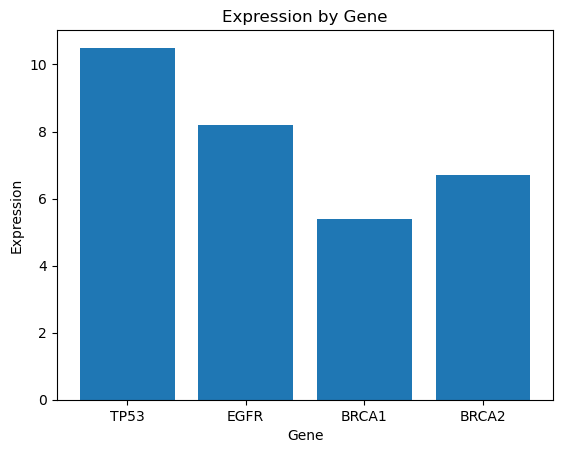

In [23]:
plt.bar(df["gene"], df["expression"])
plt.xlabel("Gene"); plt.ylabel("Expression"); plt.title("Expression by Gene")
plt.show()


In [24]:
df.to_csv("data/day4_result.csv", index=False)
pd.read_csv("data/day4_result.csv").head()


,gene,expression,z
0,TP53,10.5,1.278908
1,EGFR,8.2,0.228376
2,BRCA1,5.4,-1.050531
3,BRCA2,6.7,-0.456753


In [25]:
df.groupby("gene")["expression"].mean()


gene
BRCA1     5.4
BRCA2     6.7
EGFR      8.2
TP53     10.5
Name: expression, dtype: float64

In [26]:
df["level"] = df["z"].apply(lambda x: "high" if x > 1 else "low")


In [27]:
df

,gene,expression,z,level
0,TP53,10.5,1.278908,high
1,EGFR,8.2,0.228376,low
2,BRCA1,5.4,-1.050531,low
3,BRCA2,6.7,-0.456753,low


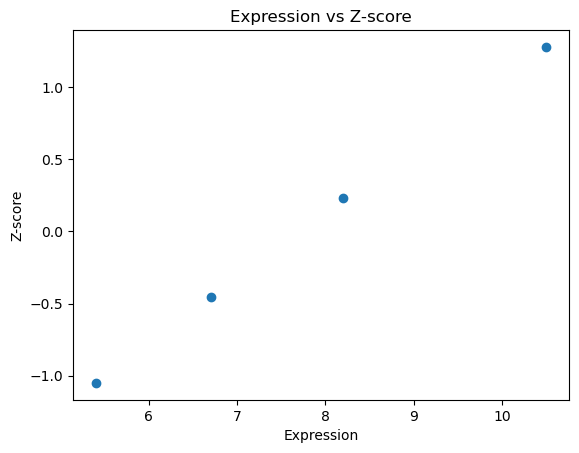

In [28]:
plt.scatter(df["expression"], df["z"])
plt.xlabel("Expression")
plt.ylabel("Z-score")
plt.title("Expression vs Z-score")
plt.show()
